# Linear Regression Code and Example

In this notebook, we present some basic ideas of numpy, matplotlib, and statsmodels.  First, import pylab.

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The pylab command above inputs lots of numpy stuff.  We don't have to "from numpy import *". It also means plots appear in place (not in a separate pop-up window.)

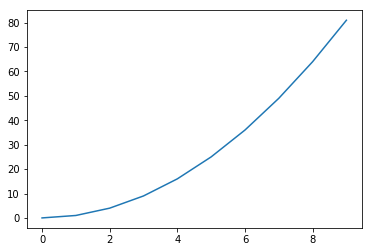

In [4]:
#some junk just to show numpy and pylab are loaded
%pylab inline
a = arange(10)
plot(a,a**2)

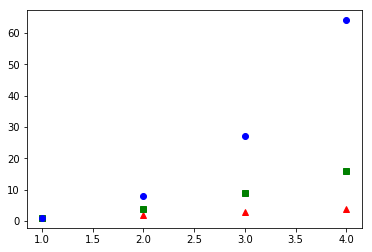

In [7]:
from matplotlib.pyplot import *
# import matplotlib.pyplot as plt
def pow(array,exp): return [x**exp for x in array]

x = [1, 2, 3, 4]

plot(x, x, 'r^', x, pow(x,2), 'gs', x, pow(x, 3), 'bo')
show()

## NYC Temperatures

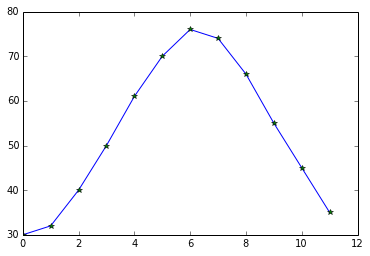

In [4]:
#NYC temperatures are from weather.com. Do Google search 'average temperature in new york city'
nyc = array([30, 32, 40, 50, 61, 70, 76, 74, 66, 55, 45, 35])
plot(nyc)
plot(nyc,'*')

In [5]:
y = nyc
months = arange(12)+0.5 #offset to middle of each month
X = array([ones(12), cos(2*pi*months/12), sin(2*pi*months/12)]).transpose()
X

array([[ 1.        ,  0.96592583,  0.25881905],
       [ 1.        ,  0.70710678,  0.70710678],
       [ 1.        ,  0.25881905,  0.96592583],
       [ 1.        , -0.25881905,  0.96592583],
       [ 1.        , -0.70710678,  0.70710678],
       [ 1.        , -0.96592583,  0.25881905],
       [ 1.        , -0.96592583, -0.25881905],
       [ 1.        , -0.70710678, -0.70710678],
       [ 1.        , -0.25881905, -0.96592583],
       [ 1.        ,  0.25881905, -0.96592583],
       [ 1.        ,  0.70710678, -0.70710678],
       [ 1.        ,  0.96592583, -0.25881905]])

## 1. Do It Yourself

We present four solutions to the linear regression problem.  The first two solutions are straightforward, but the latter two are better behaved numerically and are generally preferred.

The straightforward solution ${\hat \beta} = (X^T X)^{-1}X^Ty$ can be calculated fairly easily.  For larger, or tricky, problems QR or SVD methods should be used instead.  The main problem with the straightforward solution is that computing $X^T X$ results in a loss of numerical accuracy (especially for large $X$).  Better is to use the SVD algorithm (numpy.linalg.lstsq) or the QR algorithm (statsmodels.OLS).

Recall, to do linear algebra multiplication in numpy we use the *dot* function. $X.T$ is the transpose of $X$ and *inv* calculates the inverse of a square matrix.

In [6]:
betahat = dot(inv(dot(X.T, X)),dot(X.T,y))
betahat

array([ 52.83333333, -20.78123086,  -8.52924774])

## 2. Solve the Normal Equations

Slightly better is to use the *numpy.linalg.solve* function to solve the normal equations.  As a general rule, it is better to "solve" equations than to compute the inverse and multiply by the inverse (as we did above). I.e., solve the normal equations $(X^T X) {\hat\beta} = X^Ty$ for ${\hat\beta}$.

In [7]:
import numpy.linalg as la
betahat = la.solve(dot(X.T,X), dot(X.T,y))
betahat

array([ 52.83333333, -20.78123086,  -8.52924774])

## 3. Numpy.linalg.lstsq

The standard python method to do least squares linear regression is numpy.linalg.lstsq.  It comes with numpy and doesn't need anything else to be installed. It uses the SVD method.

In [8]:
betahat, resid, rnk, singvals = la.lstsq(X, y)
print betahat, resid, rnk, singvals

[ 52.83333333 -20.78123086  -8.52924774] [ 4.02092752] 3 [ 3.46410162  2.44948974  2.44948974]


We'll get the same numbers for betahat and resid using statsmodels (below).  Rnk=3=m means X is full rank.  Singular values >> 0 means well behaved numerically.  Be careful when singular values are close to 0.  (We used "rank" originally, but it's a numpy function, so we changed to "rnk".  Next time we'll change the %pylab statement at the top to avoid this problem.)

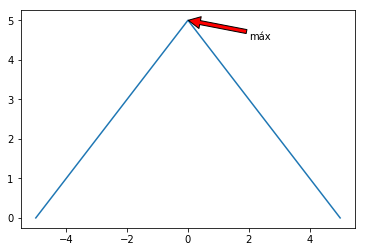

In [3]:
import numpy as np

x_data = np.arange(-5, 6)
y_data = 5 - np.absolute(x_data)

plt.plot(x_data, y_data)
plt.annotate('máx', xy=(0, 5), xytext=(2, 4.5), arrowprops=dict(facecolor='red', shrink=0.005))
plt.show()

## 4. Statsmodels

There is a newer and bigger linear regression module called "statsmodels".  statsmodels contains lots of linear regression code (and lots of other statistical models as well).  But it may not be installed by default.  It depends on your distribution.  

model.fit(method='pinv') is the default (pinv=standard definition $(X^TX)^{-1}X^Ty$).  Can also use method='qr'.  There's no great reason to use qr in this simple example (model is small and well behaved numerically), but we'll do it anyway.  All this info can be found in help(sm.OLS).

In [9]:
import statsmodels.api as sm
model = sm.OLS(y,X)
results = model.fit(method='qr')
print results.params
print results.rsquared

[ 52.83333333 -20.78123086  -8.52924774]
0.998673690758


Plot the results.  Pretty up the picture a bit.

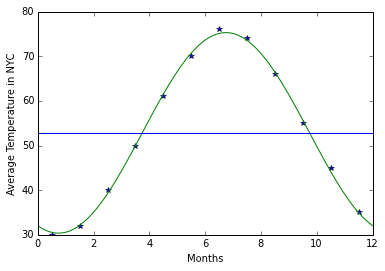

In [10]:
a, b, c = results.params
dates = linspace(0,12,101) #to produce smooth curve
fitted = a + b*cos(2*pi*dates/12) + c*sin(2*pi*dates/12)
plot(months,y,'*', dates, fitted)
axhline(y=a)
xlabel('Months')
ylabel('Average Temperature in NYC')
savefig('nyc.pdf') #comment out if you don't want to save figure

In [11]:
results.summary()

/Users/boncelet/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/scipy/stats/stats.py:1293: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3388.
Date:                Tue, 29 Apr 2014   Prob (F-statistic):           1.13e-13
Time:                        16:39:49   Log-Likelihood:                -10.467
No. Observations:                  12   AIC:                             26.93
Df Residuals:                       9   BIC:                             28.39
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         52.8333      0.193    273.815      0.000        52.397    53.270
x1           -20.7812      0.273    -76.156      0.000       -21.399   -20.164
x2            -8.5292      0.273    -31.257      0.000        -9.147    -7.912
==============================================================================
Omnibus:                        2.901   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                1.186
Skew:                           0.333   Prob(JB):                        0.553
Kurtosis:                       1.612   Cond. No.                         1.41
==============================================================================
"""

In [12]:
residuals = y - dot(X,results.params)
print residuals
print sum(residuals**2)

[-0.55267398 -0.10769515  0.78386566  0.02670901 -0.49679369 -0.69892917
  0.88600732  0.44102849 -0.45053233 -0.69337567  0.83012702  0.03226251]
4.02092751813


4.02 is the same number la.lstsq returned.

Let's see how the standard error for 'const' is determined.  Note, X'X is diagonal, so inverse is also diagonal.  The formula is ${\widehat{\sigma^2}}= ||y-{\hat y}||^2 (X^T X)^{-1}/(n-m)$.

In [13]:
d = diag(dot(X.T, X)) #get main diagonal
squarederror = sum(residuals**2)
stderr = sqrt(squarederror/(d[0]*(12-3)))
print stderr

0.192952870808


# Conclusions

For the vast majority of problems, my suggestion is to use Statsmodels with the QR method.  The QR method is fast and accurate (possibly slightly slower than la.solve, but only slightly).  Statsmodels gives lots of additional information as well.

The SVD is generally the most accurate method, but it is also the most time consuming.  For almost all problems, the QR method offers the best combination of speed and accuracy. 

-------
Charles Boncelet, 29 April 2014